In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_train = np.load("x.npy")
y_train = tf.one_hot(np.load("y2.npy"), 3)
classes=['Bluetooth', 'B', 'USB']
x_train.shape, y_train.shape
# use augmentation

((90, 28, 28, 1), TensorShape([90, 3]))

USB


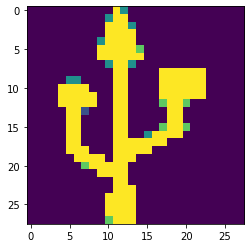

In [ ]:
idx=85
plt.imshow(np.squeeze(x_train[idx]))
print(classes[tf.argmax(y_train[idx])])

In [ ]:
model=tf.keras.models.load_model("mnist.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [ ]:
for i in model.layers[:5]:
    i.trainable=False
for i in range(1):
    model.pop()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [ ]:
model.add(tf.keras.layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 18ms/step - loss: 3.6024 - accuracy: 0.4111
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 1.7450 - accuracy: 0.6222
Epoch 3/100
3/3 [==============================] - 0s 23ms/step - loss: 1.8249 - accuracy: 0.6222
Epoch 4/100
3/3 [==============================] - 0s 17ms/step - loss: 0.8885 - accuracy: 0.7111
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 0.3981 - accuracy: 0.8667
Epoch 6/100
3/3 [==============================] - 0s 17ms/step - loss: 0.3671 - accuracy: 0.9111
Epoch 7/100
3/3 [==============================] - 0s 16ms/step - loss: 0.3754 - accuracy: 0.8889
Epoch 8/100
3/3 [==============================] - 0s 17ms/step - loss: 0.1532 - accuracy: 0.9444
Epoch 9/100
3/3 [==============================] - 0s 20ms/step - loss: 0.2321 - accuracy: 0.9556
Epoch 10/100
3/3 [==============================] - 0s 19ms/step - loss: 0.2361 - accuracy: 0.9111
Epoch 11/100
3/3 [=

In [ ]:
model.save("MNIST_transferred.h5")

In [ ]:
predictions=model.predict(x_train)

Bluetooth


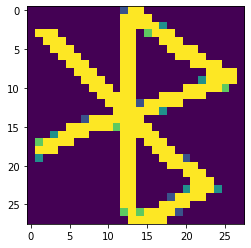

In [ ]:
idx=10
plt.imshow(np.squeeze(x_train[idx]))
print(classes[tf.argmax(predictions[idx])])